In [1]:
import os
import sys
import pandas as pd
import numpy as np

# Get the current working directory
current_dir = os.getcwd()

# Append the parent directory to sys.path
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)


In [12]:
from DB_connection.connection import PostgresConnection

In [13]:
db=PostgresConnection(database='teleco',user='postgres',password='postgres')
db.connect()

Connected to PostgreSQL database


In [14]:
query='select * from xdr_data'
db.execute_query(query)

Query executed successfully


In [16]:
df=db.fetch_data(query)
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [17]:
df.shape

(150001, 55)

In [18]:
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [19]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [27]:
# Adjust pandas settings to display full precision for floats
pd.set_option('display.float_format', '{:.0f}'.format)  # No scientific notation

In [28]:
# Count occurrences of each handset (IMEI)
handset_counts=df['IMEI'].value_counts()

#Get top 10 handsets counts
top_10_handsets=handset_counts.head(10)
print("Top 10 Handsets Used by Customers:")
print(top_10_handsets)

Top 10 Handsets Used by Customers:
IMEI
35182310355840    18
35281410321760    17
35746309624511    17
86948003612677    16
35405309346774    15
86724003047878    15
35643708181534    13
35586610643189    12
35763109653251    12
35171510435028    12
Name: count, dtype: int64


In [29]:
# Count occurrences of each handset manufacturer
manufacturer_counts = df['Handset Manufacturer'].value_counts()

# Get the top 3 manufacturers
top_3_manufacturers = manufacturer_counts.head(3)
print("Top 3 Handset Manufacturers:")
top_3_manufacturers.to_frame().reset_index()

Top 3 Handset Manufacturers:


,Handset Manufacturer,count
0,Apple,59565
1,Samsung,40839
2,Huawei,34423


In [30]:
# Filter dataset for top 3 manufacturers
top_3_manufacturers_list = top_3_manufacturers.index
filtered_df = df[df['Handset Manufacturer'].isin(top_3_manufacturers_list)]

# Identify top 5 handsets per manufacturer
top_5_handsets_per_manufacturer = {}
for manufacturer in top_3_manufacturers_list:
    manufacturer_data = filtered_df[filtered_df['Handset Manufacturer'] == manufacturer]
    top_5_handsets = manufacturer_data['IMEI'].value_counts().head(5)
    top_5_handsets_per_manufacturer[manufacturer] = top_5_handsets

print("Top 5 Handsets per Top 3 Manufacturer:")
for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    print(f"\n{manufacturer}:")
    print(handsets)

Top 5 Handsets per Top 3 Manufacturer:

Apple:
IMEI
35614709298621    8
35541107729700    8
35541807330551    8
35483109347400    7
35614309440872    7
Name: count, dtype: int64

Samsung:
IMEI
35182310355840    18
35281410321760    17
35746309624511    17
35405309346774    15
35643708181534    13
Name: count, dtype: int64

Huawei:
IMEI
86948003612677    16
86724003047878    15
86376903249104    11
86376903229487    10
86540802081955    10
Name: count, dtype: int64


In [31]:
# Example of interpretation could be summarizing the output
print("Interpretation and Recommendations:")

# Example for top 10 handsets
print("\nTop 10 Handsets Used by Customers:")
print(top_10_handsets)

# Example for top 3 manufacturers
print("\nTop 3 Handset Manufacturers:")
print(top_3_manufacturers)

# Example for top 5 handsets per manufacturer
print("\nTop 5 Handsets per Manufacturer:")
for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    print(f"\n{manufacturer}:")
    print(handsets)


Interpretation and Recommendations:

Top 10 Handsets Used by Customers:
IMEI
35182310355840    18
35281410321760    17
35746309624511    17
86948003612677    16
35405309346774    15
86724003047878    15
35643708181534    13
35586610643189    12
35763109653251    12
35171510435028    12
Name: count, dtype: int64

Top 3 Handset Manufacturers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64

Top 5 Handsets per Manufacturer:

Apple:
IMEI
35614709298621    8
35541107729700    8
35541807330551    8
35483109347400    7
35614309440872    7
Name: count, dtype: int64

Samsung:
IMEI
35182310355840    18
35281410321760    17
35746309624511    17
35405309346774    15
35643708181534    13
Name: count, dtype: int64

Huawei:
IMEI
86948003612677    16
86724003047878    15
86376903249104    11
86376903229487    10
86540802081955    10
Name: count, dtype: int64


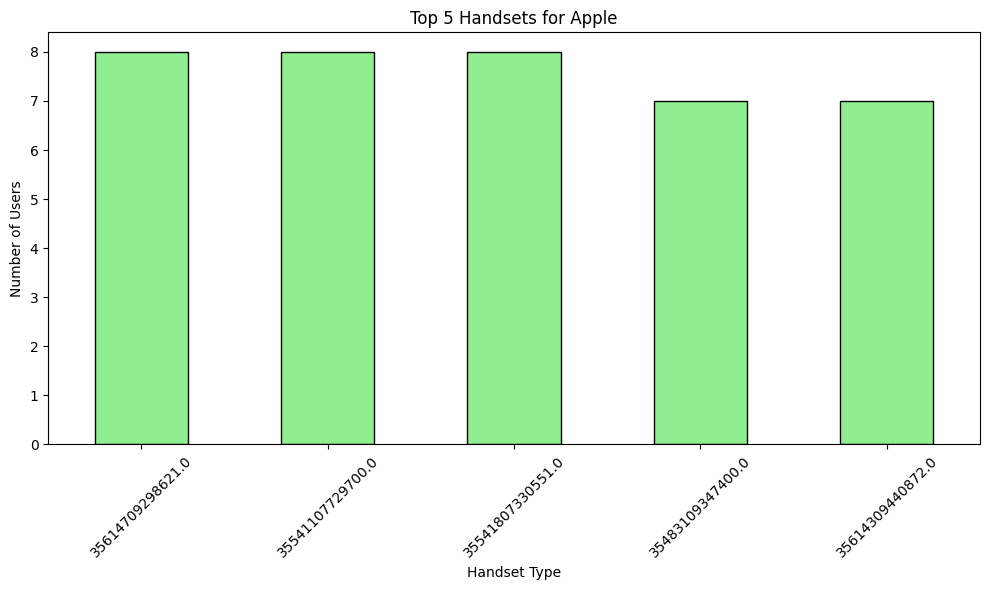

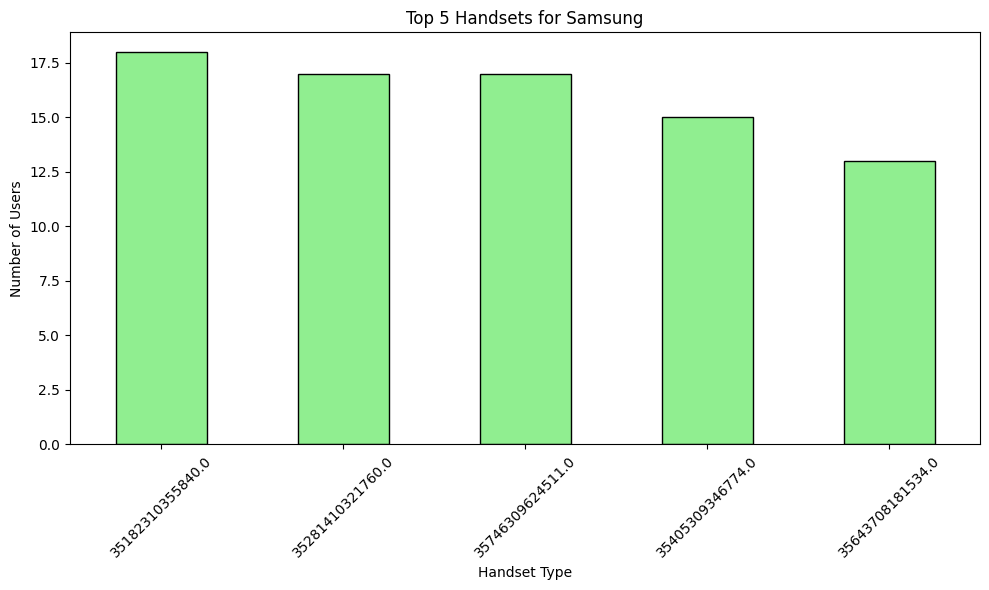

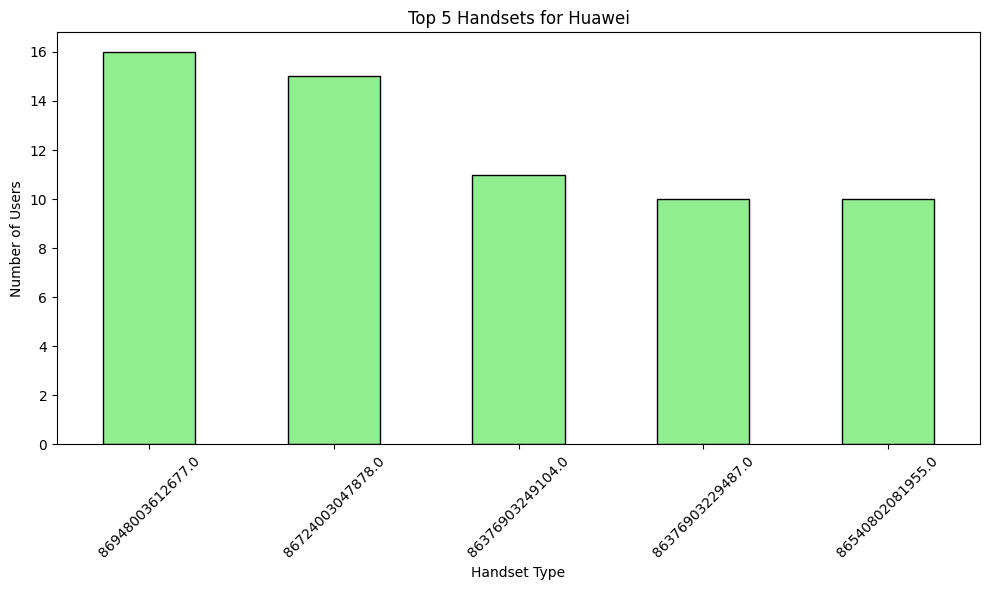

In [33]:
import matplotlib.pyplot as plt
# 3. Plot for Top 5 Handsets per Top 3 Manufacturer
for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    plt.figure(figsize=(10, 6))
    handsets.plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title(f'Top 5 Handsets for {manufacturer}')
    plt.xlabel('Handset Type')
    plt.ylabel('Number of Users')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [35]:
# Aggregate the required information per user (MSISDN/Number)
user_overview = df.groupby('MSISDN/Number').agg(
    number_of_xDR_sessions=('Bearer Id', 'nunique'),  # Count unique xDR sessions (assuming 'Bearer Id' represents sessions)
    total_session_duration=('Dur. (ms)', 'sum'),  # Sum of session durations
    total_download_data=('Total DL (Bytes)', 'sum'),  # Total download data
    total_upload_data=('Total UL (Bytes)', 'sum'),  # Total upload data
    total_data_volume_social_media=('Social Media DL (Bytes)', 'sum'),  # Total Social Media download volume
    total_data_volume_google=('Google DL (Bytes)', 'sum'),  # Total Google download volume
    total_data_volume_email=('Email DL (Bytes)', 'sum'),  # Total Email download volume
    total_data_volume_youtube=('Youtube DL (Bytes)', 'sum'),  # Total YouTube download volume
    total_data_volume_netflix=('Netflix DL (Bytes)', 'sum'),  # Total Netflix download volume
    total_data_volume_gaming=('Gaming DL (Bytes)', 'sum'),  # Total Gaming download volume
    total_data_volume_other=('Other DL (Bytes)', 'sum')  # Total Other download volume
).reset_index()

# Display the result
print("User Overview:")
user_overview.head()

User Overview:


,MSISDN/Number,number_of_xDR_sessions,total_session_duration,total_download_data,total_upload_data,total_data_volume_social_media,total_data_volume_google,total_data_volume_email,total_data_volume_youtube,total_data_volume_netflix,total_data_volume_gaming,total_data_volume_other
0,33601001722,1,116720,842637466,36053108,2206504,3337123,837400,14900201,10265105,811091133,377096990
1,33601001754,1,181230,120755184,36104459,2598548,4197697,2828821,5324251,770569,105035298,279557701
2,33601002511,1,134969,556659663,39306820,3148004,3343483,2436500,2137272,16525919,529068485,495086501
3,33601007832,1,49878,401993172,20327526,251469,5937765,2178618,4393123,1157362,388074835,25248001
4,33601008617,2,37104,1363130417,94280527,2861230,13728668,2247808,10339971,24971647,1308981093,777643713
